In [1]:

import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [3]:
np.random.seed(42)


 Designing model

# New Section
![image.png](attachment:image.png)

In [4]:
# Define the model
new_model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),  # First hidden layer with input shape
    keras.layers.Dense(30, activation='relu'),  # Second hidden layer
    keras.layers.Dense(30, activation='relu'),  # Third hidden layer
    keras.layers.Dense(1)  # Output layer with a single neuron for regression output
])



In [5]:
## Configure the model losses and metrics
new_model.compile(optimizer='sgd', loss='mean_squared_error')



##  train the model using fit
history = new_model.fit(X_train, y_train, epochs=20, validation_data=(X_valid,y_valid))



Epoch 1/20
363/363 [==============================] - 6s 8ms/step - loss: 0.7361 - val_loss: 1.0430
Epoch 2/20
363/363 [==============================] - 2s 6ms/step - loss: 0.4293 - val_loss: 1.0983
Epoch 3/20
363/363 [==============================] - 2s 6ms/step - loss: 0.3943 - val_loss: 0.3730
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3730 - val_loss: 0.3892
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3633 - val_loss: 0.3777
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3539 - val_loss: 0.3912
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3481 - val_loss: 0.3968
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3425 - val_loss: 0.3561
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3361 - val_loss: 0.3652
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3311 - val_loss: 0.3834

 Evaluating the Model.Our previous model yielded 0.4082 as the mse score. I

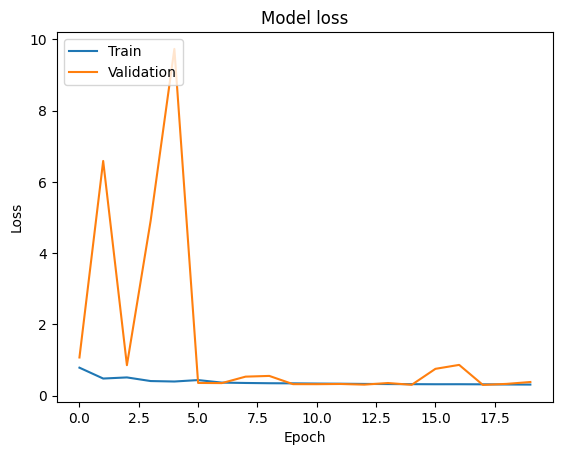

In [ ]:
## Evaluate model on the training set
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



We can figure out that the previous model outperformed the new design by comparing these two MSE scores.
This conclusion is backed by the fact that lower MSE scores denote better model performance.
The MSE measures the average squared difference between predicted values and actual values.
The MSE score of 0.4082 from the old model in this instance is less than the MSE score of roughly 1.14106 from the new design,
indicating that the old model performed better in terms of prediction due to its smaller errors.